In [4]:
import sys
sys.path.append("..")
from library import *

In [5]:
def get_rand_hermitian(n):
    shape = (n, n)
    U = np.random.uniform(-1, 1, shape) + 1.j * np.random.uniform(-1, 1, shape)
    return np.tril(U, -1) + np.tril(U, -1).conj().T + np.diag(np.random.uniform(-1, 1, n))

def get_image_data(ham, m_values, tau_values):
    # ham_norm = get_matrix_norm(ham)  # just the biggest eigenvalue (in absolute value)

    # m_values = np.linspace(1, 10, 200)
    # tau_values = np.linspace(1/100, 15 / ham_norm, 200)
    # print(m_values[-1], tau_values[-1]*herm_norm)

    data = np.zeros(shape=(len(m_values), len(tau_values)))
    for itau, tau in enumerate(tau_values):
        ite = get_ite(ham, tau)
        for im, m in enumerate(m_values):
            strott = get_trotter_S(ham, tau, m)
            fid = get_fidelity(ite, strott)

            error = 1 - fid
            data[len(m_values) - 1 - im, itau] = error
        print(f"Step {itau+1}/{len(tau)} done!")
    return data

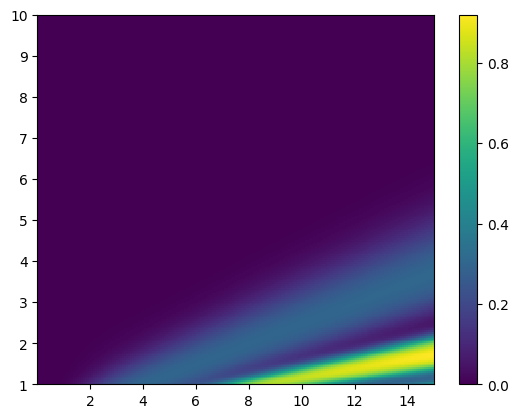

In [8]:
ham = get_rand_hermitian(n=64)
ham_norm = get_matrix_norm(ham)  # just the biggest eigenvalue (in absolute value)

m_values = np.linspace(1, 10, 100)
tau_values = np.linspace(1/100, 15 / ham_norm, 100)
print(m_values[-1], tau_values[-1] * ham_norm)

data = get_image_data(ham, m_values, tau_values)

extent = [tau_values[0]*ham_norm, tau_values[-1]*ham_norm, m_values[0], m_values[-1]]
fig, ax = plt.subplots()
im = ax.imshow(data, interpolation='nearest', extent=extent, aspect="auto")
cbar = fig.colorbar(im, ax=ax)